In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

In [2]:
#!pip install xgboost

In [3]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Data_Science_Alura/ML_Classificacao/Classificacao_01/marketing_investimento.csv")

In [4]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


1 ) - Análise Exploratória dos Dados 

In [5]:
linhas, colunas = dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:1268
Total de Colunas:9


In [6]:
dados.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [8]:
dados.describe()

,idade,saldo,tempo_ult_contato,numero_contatos
count,1268.000000,1268.000000,1268.000000,1268.000000
mean,41.376972,1443.426656,367.574921,2.715300
std,11.383805,2690.406767,347.969723,2.885642
min,19.000000,-1206.000000,5.000000,1.000000
25%,33.000000,91.250000,134.000000,1.000000
50%,39.000000,491.500000,251.000000,2.000000
75%,49.000000,1623.500000,488.250000,3.000000
max,87.000000,27069.000000,3025.000000,32.000000


In [9]:
dados['aderencia_investimento'].value_counts()

aderencia_investimento
nao    766
sim    502
Name: count, dtype: int64

In [10]:
dados['aderencia_investimento'].value_counts(normalize=True) * 100

aderencia_investimento
nao    60.410095
sim    39.589905
Name: proportion, dtype: float64

In [11]:
# 1.1)Visualização gráfica das variaveis Categóricas

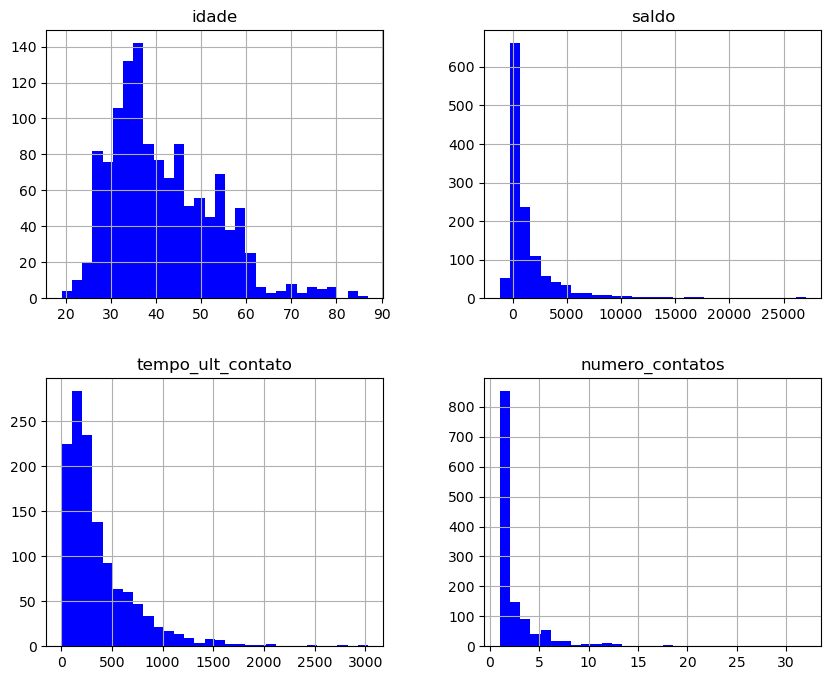

In [12]:
dados.hist(bins=30, figsize=(10, 8), color = 'b');

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


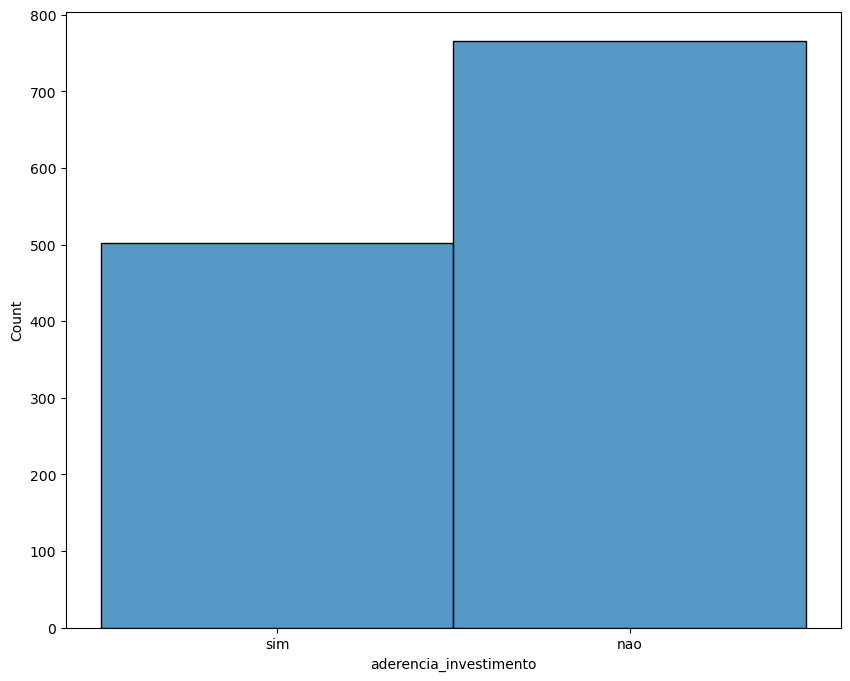

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(data=dados, x='aderencia_investimento')
plt.show();

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


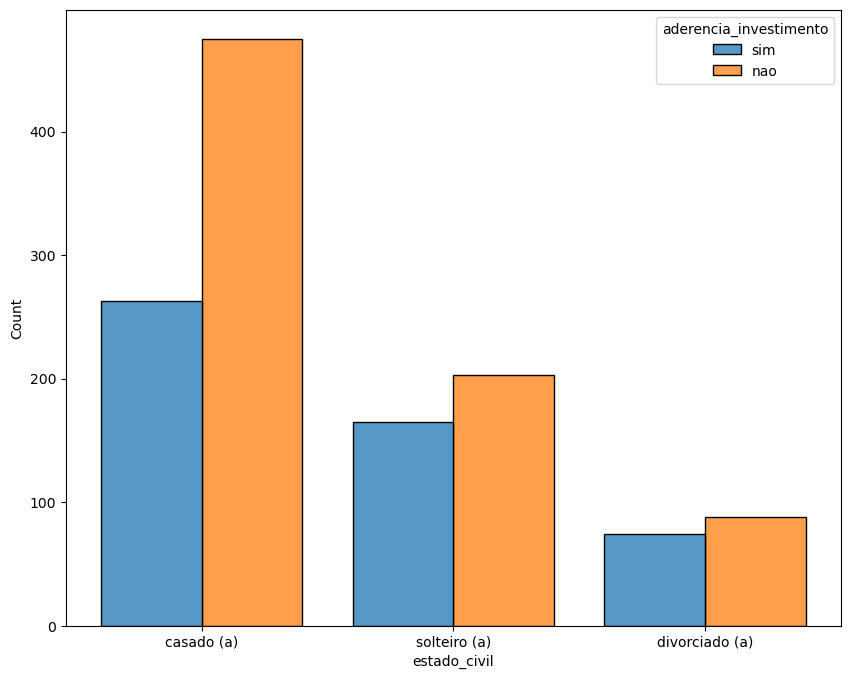

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=dados, x='estado_civil', hue='aderencia_investimento', multiple='dodge', shrink=0.8)
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


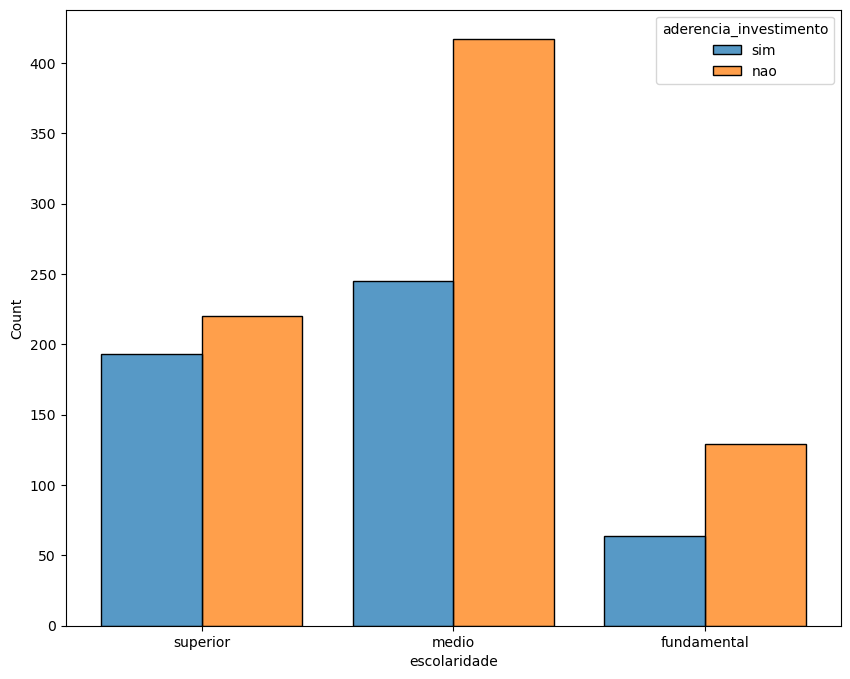

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data=dados, x='escolaridade', hue='aderencia_investimento', multiple='dodge', shrink=0.8)
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


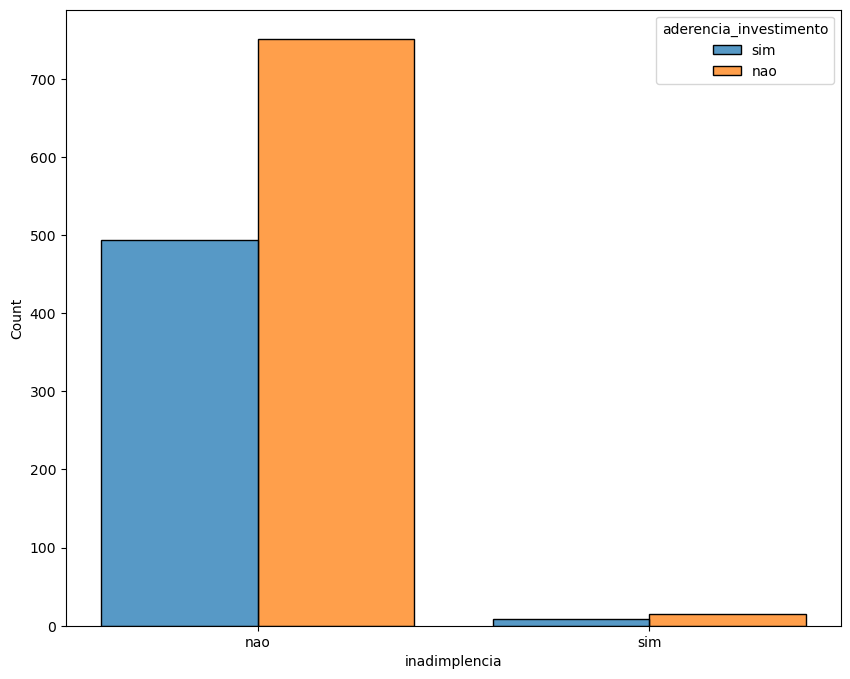

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(data=dados, x='inadimplencia', hue='aderencia_investimento', multiple='dodge', shrink=0.8)
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


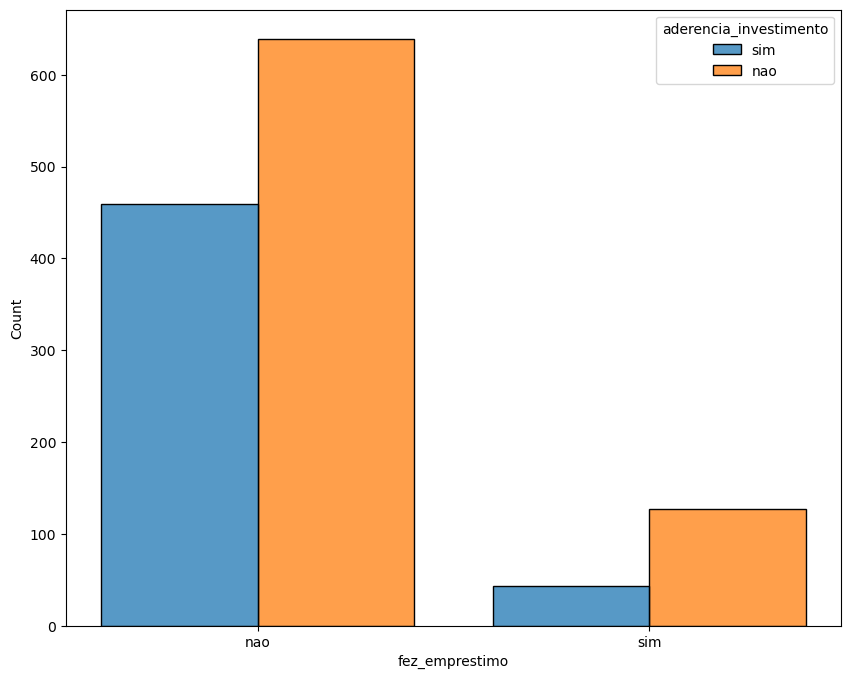

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data=dados, x='fez_emprestimo', hue='aderencia_investimento', multiple='dodge', shrink=0.8)
plt.show()

In [18]:
# 1.2)Visualização gráfica das variaveis Numéricas

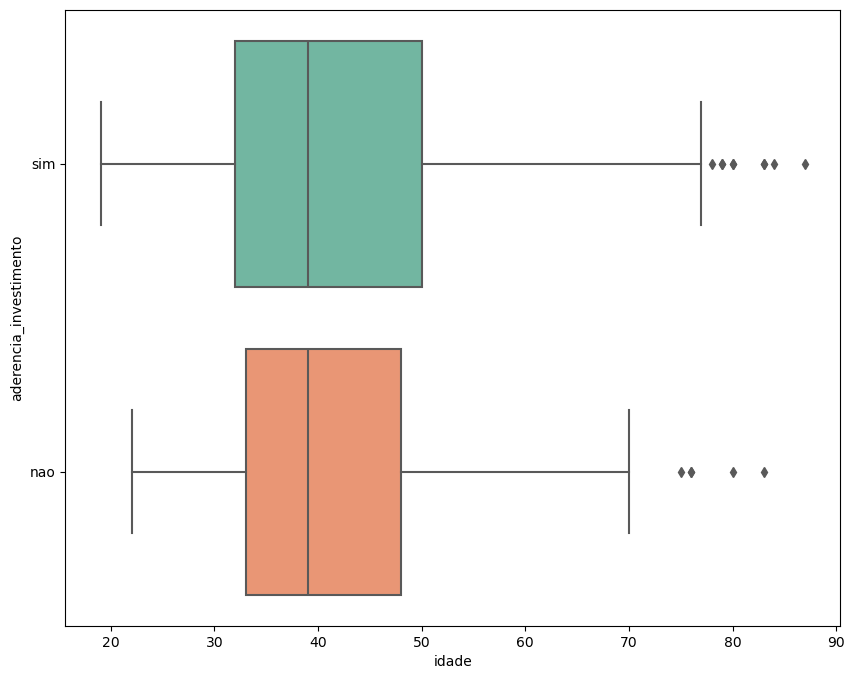

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dados, x='idade', y='aderencia_investimento', palette='Set2')
plt.show()

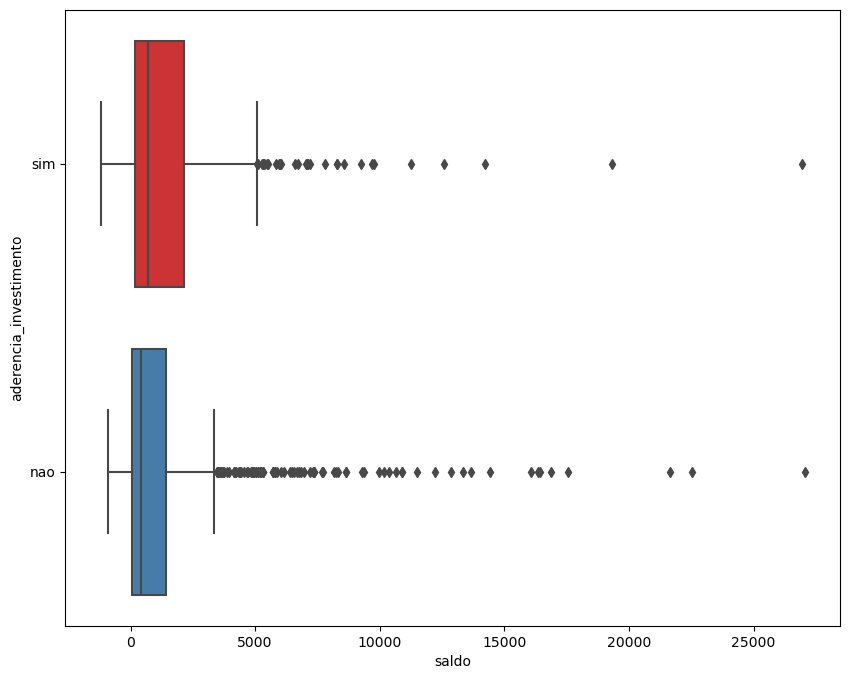

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dados, x='saldo', y='aderencia_investimento', palette='Set1')
plt.show()

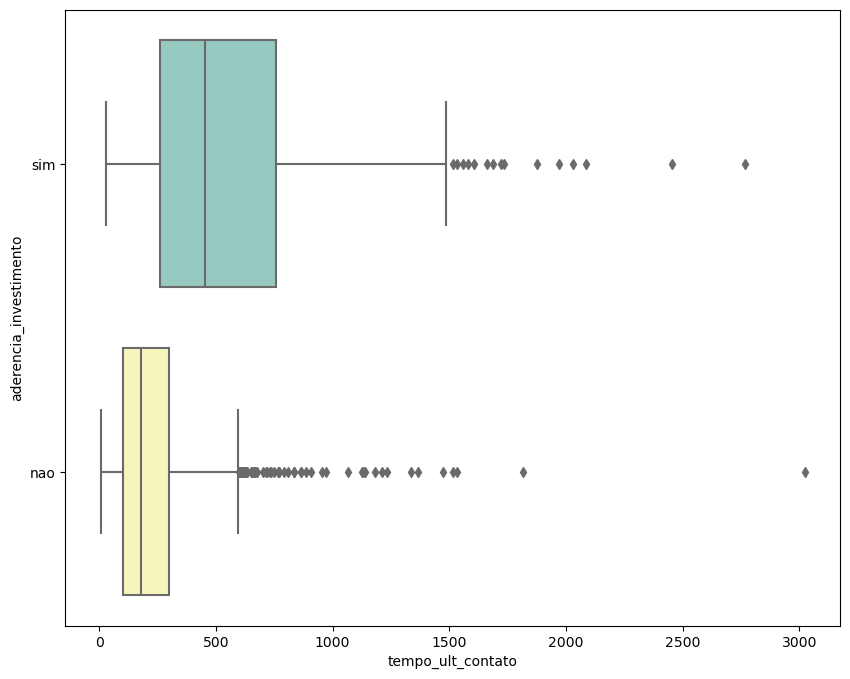

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dados, x='tempo_ult_contato', y='aderencia_investimento', palette='Set3')
plt.show()

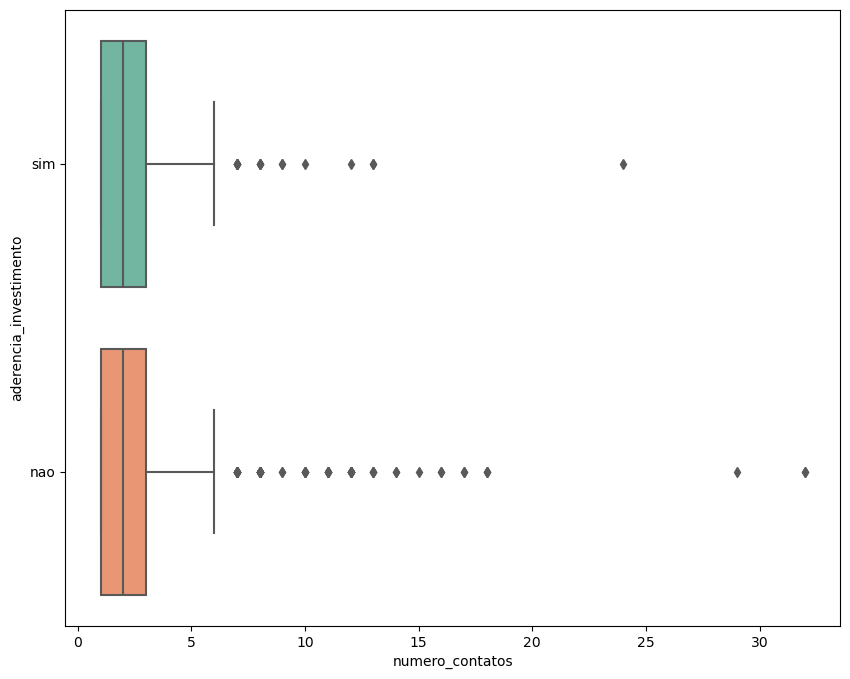

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dados, x='numero_contatos', y='aderencia_investimento', palette='Set2')
plt.show()

2 ) - Transformação dos Dados (Variaveis explicativas(x) e Variaveis Alvo(y)) 

In [23]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [24]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

In [25]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [26]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

In [27]:
#2.1) - Transformação das variaveis explicativas "OneHotEncoder" - Textos em dados para o modelos

In [28]:
colunas = x.columns

In [29]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']),
    remainder = 'passthrough',
    sparse_threshold = 0)

In [30]:
x = one_hot.fit_transform(x)

In [31]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [32]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [33]:
#2.2) - Transformação da variavel Alvo em 
#(0 - para ausência da caracteristica e 1 - para presença da caracteristica)

In [34]:
label_encoder = LabelEncoder()

In [35]:
y = label_encoder.fit_transform(y)

In [36]:
y

array([1, 1, 0, ..., 1, 1, 1])

3 ) - Divisão dos dados para Treinamento e Testes

In [37]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

In [38]:
x_treino.shape, x_teste.shape

((951, 12), (317, 12))

In [39]:
y_treino.shape, y_teste.shape

((951,), (317,))

4 ) - Aplicação do Modelo ÁRVORE DE DECISÃO

In [40]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [41]:
modelo_arvore.predict(x_teste)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [42]:
y_previsao = modelo_arvore.predict(x_teste)

In [43]:
print(f" Accuracy {round(100 * accuracy_score(y_previsao, y_teste), 2)} %")

 Accuracy 71.61 %


In [44]:
modelo_arvore.score(x_teste, y_teste)

0.7160883280757098

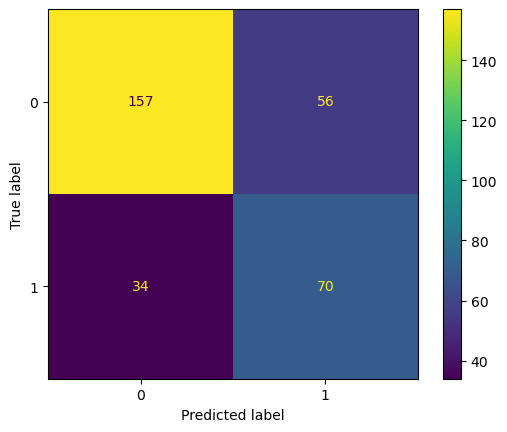

In [45]:
matriz_arvore = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_arvore)
visual.plot();

In [47]:
#Relatorio da previsão
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       191
           1       0.67      0.56      0.61       126

    accuracy                           0.72       317
   macro avg       0.71      0.69      0.69       317
weighted avg       0.71      0.72      0.71       317



In [48]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

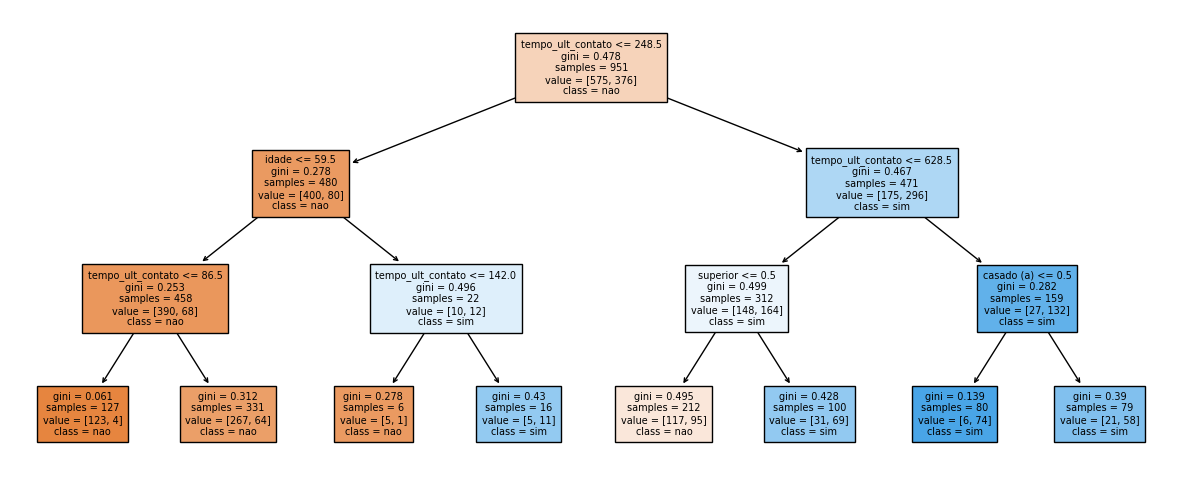

In [49]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);

5 ) - Necessidades de Normalizar os dados para Operação de Outros Modelos


$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [50]:
normalizacao = MinMaxScaler()
x_treino_nor = normalizacao.fit_transform(x_treino)

In [51]:
pd.DataFrame(x_treino_nor)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


6 ) - Aplicação do Modelo XG-BOOST CLASSIFIER

In [52]:
modelo_xgb = xgb.XGBClassifier(Learnin_rate = 0.1, max_depth = 20, use_label_encoder = False)
modelo_xgb.fit(x_treino_nor, y_treino)

/Applications/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:46:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "Learnin_rate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(Learnin_rate=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
x_teste_nor = normalizacao.transform(x_teste)

In [54]:
y_previsao = modelo_xgb.predict(x_teste_nor)

In [55]:
print(f" Accuracy {round(100 * accuracy_score(y_previsao, y_teste), 2)} %")

 Accuracy 71.29 %


In [56]:
modelo_xgb.score(x_teste_nor, y_teste)

0.7129337539432177

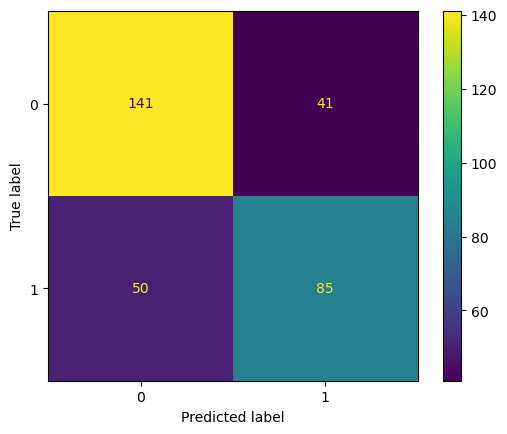

In [57]:
matriz_xgb = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_xgb)
visual.plot();

In [90]:
print(matriz_xgb)

[[141  41]
 [ 50  85]]


In [58]:
#Relatorio da previsão
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       191
           1       0.63      0.67      0.65       126

    accuracy                           0.71       317
   macro avg       0.70      0.71      0.70       317
weighted avg       0.72      0.71      0.71       317



7 ) - Aplicação do Modelo KNN

In [59]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_treino_nor, y_treino)

KNeighborsClassifier()

In [60]:
x_teste_nor = normalizacao.transform(x_teste)

In [61]:
y_previsao = modelo_knn.predict(x_teste_nor)

In [62]:
print(f" Accuracy {round(100 * accuracy_score(y_previsao, y_teste), 2)} %")

 Accuracy 68.77 %


In [63]:
modelo_knn.score(x_teste_nor, y_teste)

0.6876971608832808

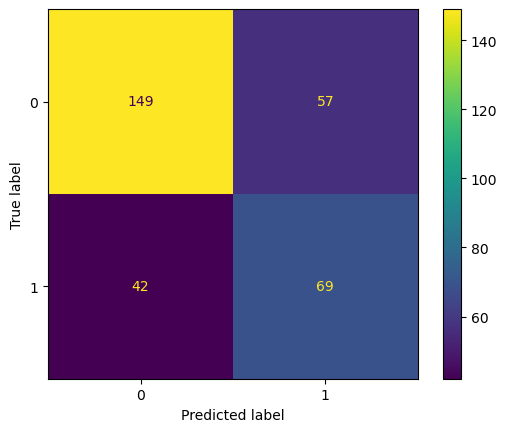

In [64]:
matriz_knn = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_knn)
visual.plot();

In [91]:
print(matriz_knn)

[[149  57]
 [ 42  69]]


In [65]:
#Relatorio da previsão
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       191
           1       0.62      0.55      0.58       126

    accuracy                           0.69       317
   macro avg       0.67      0.66      0.67       317
weighted avg       0.68      0.69      0.68       317



8 ) - Aplicação do Modelo RANDON FOREST

In [66]:
modelo_ranfort = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
modelo_ranfort.fit(x_treino_nor, y_treino) 

RandomForestClassifier(criterion='entropy', random_state=0)

In [67]:
x_teste_nor = normalizacao.transform(x_teste)

In [68]:
y_previsao = modelo_ranfort.predict(x_teste_nor)

In [69]:
print(f" Accuracy {round(100 * accuracy_score(y_previsao, y_teste), 2)} %")

 Accuracy 70.35 %


In [70]:
modelo_ranfort.score(x_teste_nor, y_teste)

0.7034700315457413

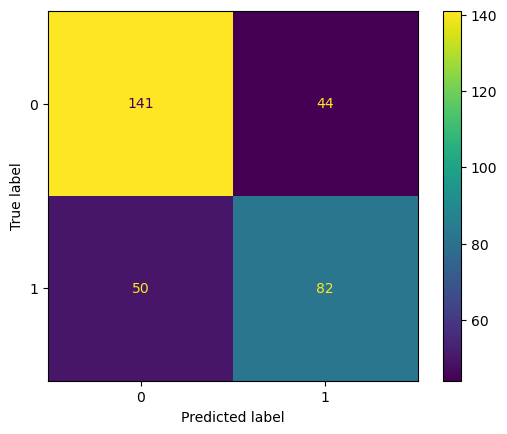

In [71]:
matriz_ranfort = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_ranfort)
visual.plot();

In [92]:
print(matriz_ranfort)

[[141  44]
 [ 50  82]]


In [72]:
#Relatorio da previsão
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       191
           1       0.62      0.65      0.64       126

    accuracy                           0.70       317
   macro avg       0.69      0.69      0.69       317
weighted avg       0.71      0.70      0.70       317



9 ) - Aplicação do Modelo LOGISTIC REGRESSION CLASSIFIER

In [73]:
modelo_LogReg = LogisticRegression(max_iter = 10000)
modelo_LogReg.fit(x_treino_nor, y_treino)

LogisticRegression(max_iter=10000)

In [74]:
x_teste_nor = normalizacao.transform(x_teste)

In [75]:
y_previsao = modelo_LogReg.predict(x_teste_nor)

In [76]:
print(f" Accuracy {round(100 * accuracy_score(y_previsao, y_teste), 2)} %")

 Accuracy 71.92 %


In [77]:
modelo_LogReg.score(x_teste_nor, y_teste)

0.7192429022082019

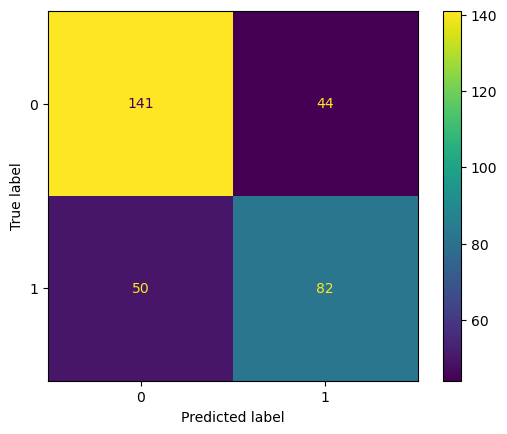

In [78]:
matriz_LogReg = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_ranfort)
visual.plot();

In [93]:
print(matriz_LogReg)

[[166  64]
 [ 25  62]]


In [79]:
#Relatorio da previsão
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       191
           1       0.71      0.49      0.58       126

    accuracy                           0.72       317
   macro avg       0.72      0.68      0.69       317
weighted avg       0.72      0.72      0.71       317



10 ) - Aplicação do Modelo SUPPORT VECTOR MACHINE CLASSIFIER

In [80]:
modelo_svm = LinearSVC(max_iter = 1000)
modelo_svm = CalibratedClassifierCV(modelo_svm)
modelo_svm.fit(x_treino_nor, y_treino)

CalibratedClassifierCV(estimator=LinearSVC())

In [81]:
x_teste_nor = normalizacao.transform(x_teste)

In [82]:
y_previsao = modelo_svm.predict(x_teste_nor)

In [83]:
print(f" Accuracy {round(100 * accuracy_score(y_previsao, y_teste), 2)} %")

 Accuracy 73.82 %


In [84]:
modelo_svm.score(x_teste_nor, y_teste)

0.7381703470031545

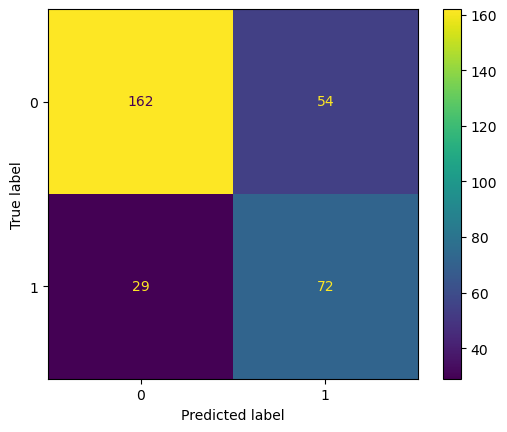

In [85]:
matriz_svm = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_svm)
visual.plot();

In [94]:
print(matriz_svm)

[[162  54]
 [ 29  72]]


In [86]:
#Relatorio da previsão
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       191
           1       0.71      0.57      0.63       126

    accuracy                           0.74       317
   macro avg       0.73      0.71      0.72       317
weighted avg       0.74      0.74      0.73       317



11 ) - RESUMO DOS MODELOS APLICADOS POR MEIO DA ACURÁCIA 

In [87]:
print(f'Acurácia da Árvore sem Normalização: {round(100 * modelo_arvore.score(x_teste, y_teste), 2)} %')
print(f'Acurácia do Modelo XG-BOOST com a Normalização: {round(100 * modelo_xgb.score(x_teste_nor, y_teste), 2)} %')
print(f'Acurácia do Modelo KNN com a Normalização: {round(100 * modelo_knn.score(x_teste_nor, y_teste), 2)} %')
print(f'Acurácia do Modelo RANDON FOREST com a Normalização: {round(100 * modelo_ranfort.score(x_teste_nor, y_teste), 2)} %')
print(f'Acurácia do Modelo LOGISTIC REGRESSION CLASSIFIER com a Normalização: {round(100 * modelo_LogReg.score(x_teste_nor, y_teste), 2)} %')
print(f'Acurácia do Modelo SUPPORT VECTOR MACHINE CLASSIFIER com a Normalização: {round(100 * modelo_svm.score(x_teste_nor, y_teste), 2)} %')

Acurácia da Árvore sem Normalização: 71.61 %
Acurácia do Modelo XG-BOOST com a Normalização: 71.29 %
Acurácia do Modelo KNN com a Normalização: 68.77 %
Acurácia do Modelo RANDON FOREST com a Normalização: 70.35 %
Acurácia do Modelo LOGISTIC REGRESSION CLASSIFIER com a Normalização: 71.92 %
Acurácia do Modelo SUPPORT VECTOR MACHINE CLASSIFIER com a Normalização: 73.82 %
